# フィラデルフィア半導体指数

In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

In [2]:
symbol = '^SOX'
ticker = yf.Ticker(symbol)

df = ticker.history(period='6mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-11-15 00:00:00-05:00,4914.080078,4936.189941,4816.529785,4833.589844,0,0.0,0.0
2024-11-18 00:00:00-05:00,4833.459961,4896.770020,4806.000000,4888.770020,0,0.0,0.0
2024-11-19 00:00:00-05:00,4874.180176,4925.060059,4860.729980,4919.160156,0,0.0,0.0
2024-11-20 00:00:00-05:00,4902.410156,4902.839844,4813.299805,4884.250000,0,0.0,0.0
2024-11-21 00:00:00-05:00,4949.390137,4989.910156,4842.160156,4963.049805,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-08 00:00:00-04:00,4444.169922,4494.870117,4392.959961,4430.439941,0,0.0,0.0
2025-05-09 00:00:00-04:00,4509.319824,4515.759766,4433.259766,4466.500000,0,0.0,0.0
2025-05-12 00:00:00-04:00,4769.750000,4807.000000,4708.149902,4780.930176,0,0.0,0.0


## 日足チャートとパラボリック SAR

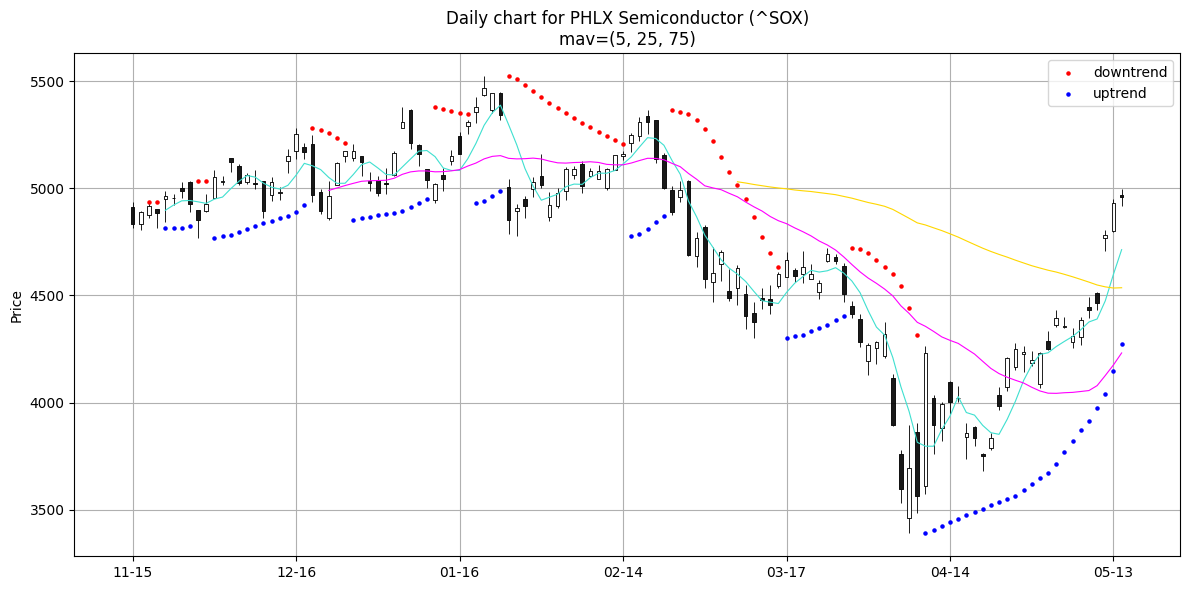

In [3]:
dict_psar = psar(df)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=5,
        color='red',
        label='downtrend',
        ax=ax
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=5,
        color='blue',
        label='uptrend',
        ax=ax
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    mav=(5, 25, 75),
    volume=False,
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
try:
    ax.set_title('Daily chart for %s (%s)\nmav=(5, 25, 75)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nmav=(5, 25, 75)' % symbol)

ax.grid()

plt.tight_layout()
plt.savefig('daily_chart_SOX.png')
plt.show()

In [4]:
df.tail(2)['Close']

Date
2025-05-13 00:00:00-04:00    4931.350098
2025-05-14 00:00:00-04:00    4960.734863
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2025-05-13 00:00:00-04:00          NaN
2025-05-14 00:00:00-04:00    29.384766
Name: Close, dtype: float64